# Evaluación - Aprendizaje NO supervisado

**Integrante 1:**

**Integrante 2:**

**Correo Electrónico integrante 1:**


**Correo Electrónico integrante 2:**

---

## Descripción

Este notebook contiene la evaluación asociada al tópico de aprendizaje NO supervisado de la asignatura de Inteligencia Artificial de la carrera de Ingeniería Civil en informática de la UBB.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)
- kneed-0.8.5

# Descripción de los datos

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

In [6]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/affairs.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
!pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.base import TransformerMixin

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carga de datos

In [9]:
data_affair = pd.read_csv("affairs.csv")
data_affair.shape

(6366, 10)

In [10]:
data_affair.head(7)

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174


In [11]:
data_affair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


# Análisis preliminar de los datos

# Religión

Text(0, 0.5, 'Densidad')

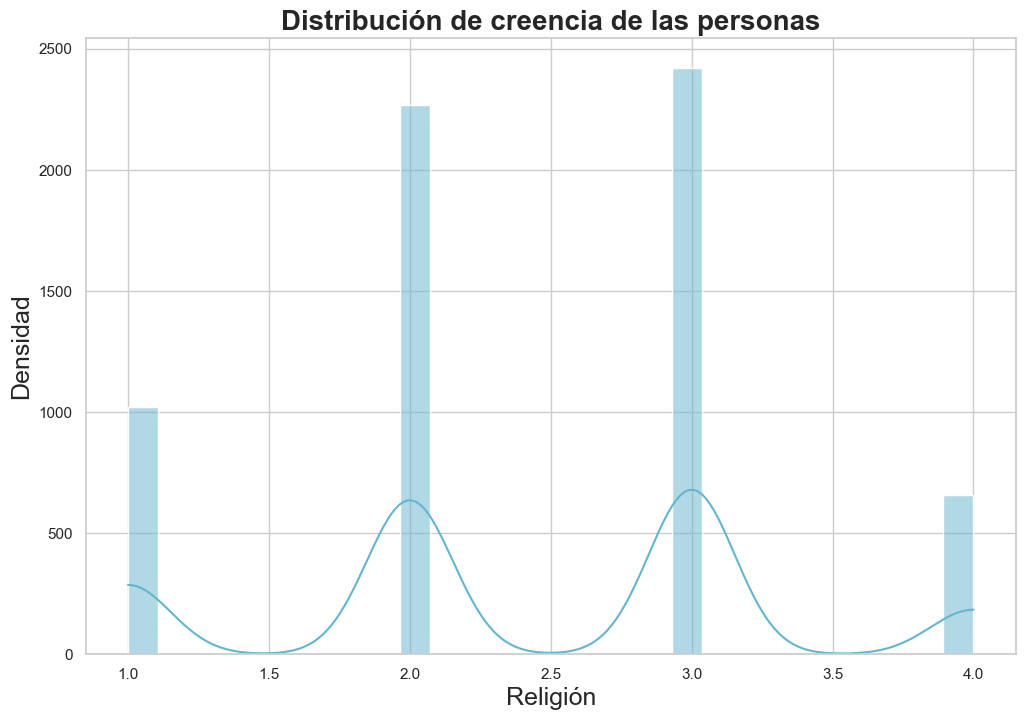

In [12]:
# Escriba su código acá
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['religious'], kde = True, color = 'c')
plt.title('Distribución de creencia de las personas', fontsize = 20, fontweight="bold")
plt.xlabel("Religión", fontsize=18)
plt.ylabel("Densidad", fontsize=18)

In [13]:
pd.DataFrame(data_affair.religious.describe()).T

,count,mean,std,min,25%,50%,75%,max
religious,6366.0,2.42617,0.878369,1.0,2.0,2.0,3.0,4.0


In [14]:
pd.DataFrame(data_affair.religious.value_counts())

,count
religious,
3.0,2422
2.0,2267
1.0,1021
4.0,656


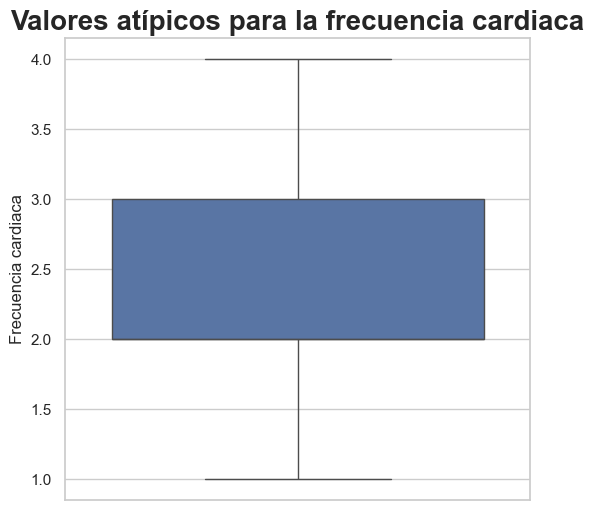

In [15]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la frecuencia cardiaca", fontsize=20, fontweight="bold")
plt.ylabel("Frecuencia cardiaca")
sns.boxplot(y='religious',data=data_affair);

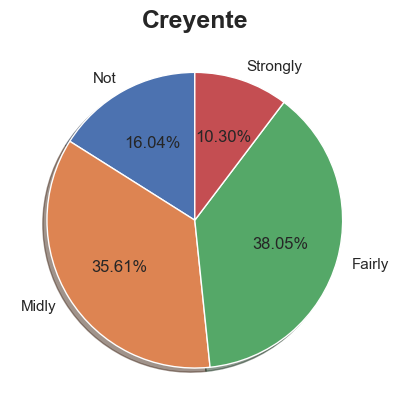

In [16]:
clases = np.array([data_affair[data_affair.religious == 1].shape[0],
                   data_affair[data_affair.religious == 2].shape[0],
                   data_affair[data_affair.religious == 3].shape[0],
                   data_affair[data_affair.religious == 4].shape[0]])
labels = ['Not', 'Midly', 'Fairly', 'Strongly']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Creyente', fontsize=18, fontweight="bold")
plt.show()

## Comentarios sobre la religión.
+ 1. La minoria de personas o es muy religiosa o es para nada religiosa.
+ 2. No tiene datos atipicos.
+ 3. La mayoria de personas creen poco o lo preciso.
+ 4. El % mas alto es 35.61% que correponde a creencia mediana en la religión.

# Niveles de educación

Text(0, 0.5, 'Densidad')

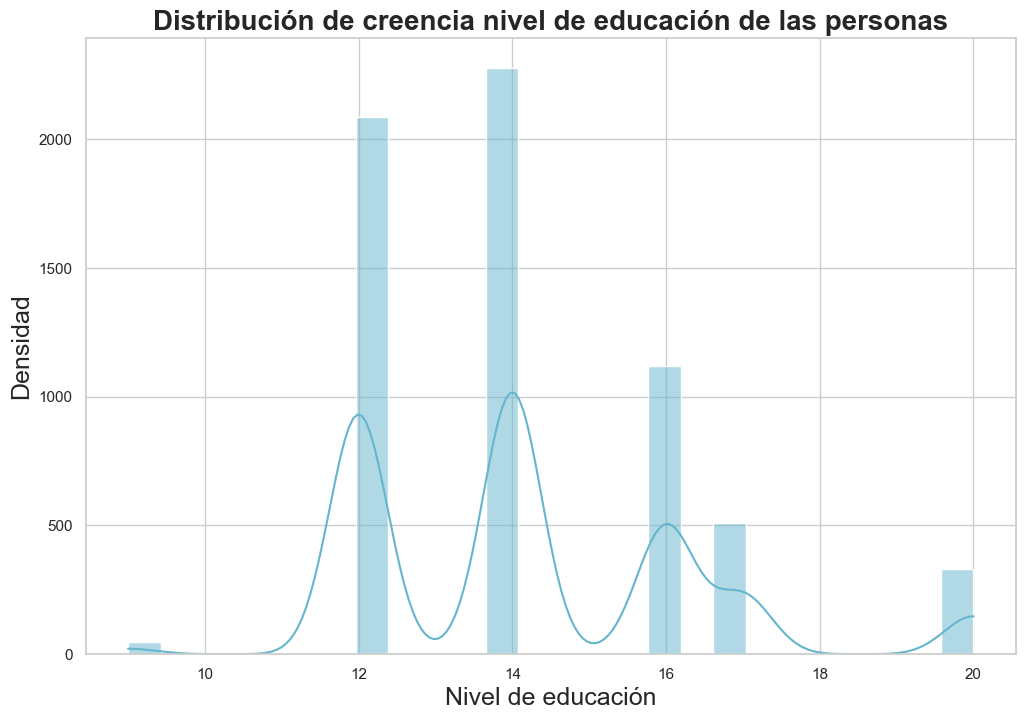

In [17]:
# Escriba su código acá
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['educ'], kde = True, color = 'c')
plt.title('Distribución de creencia nivel de educación de las personas', fontsize = 20, fontweight="bold")
plt.xlabel("Nivel de educación", fontsize=18)
plt.ylabel("Densidad", fontsize=18)

In [18]:
pd.DataFrame(data_affair.educ.describe()).T

,count,mean,std,min,25%,50%,75%,max
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.0,20.0


In [19]:
pd.DataFrame(data_affair.educ.value_counts())

,count
educ,
14.0,2277
12.0,2084
16.0,1117
17.0,510
20.0,330
9.0,48


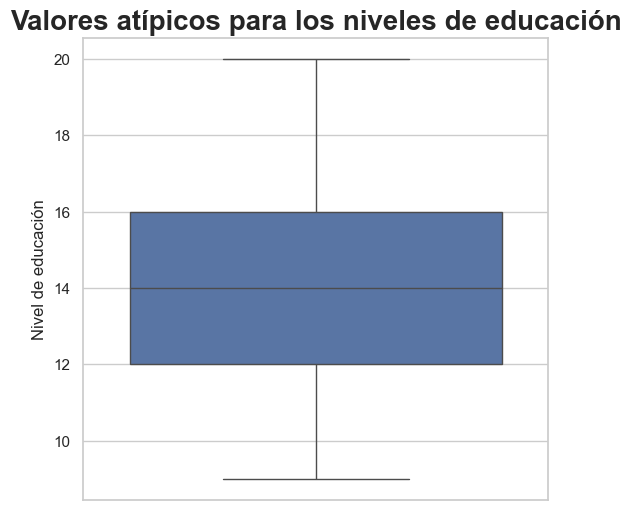

In [20]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para los niveles de educación", fontsize=20, fontweight="bold")
plt.ylabel("Nivel de educación")
sns.boxplot(y='educ',data=data_affair);

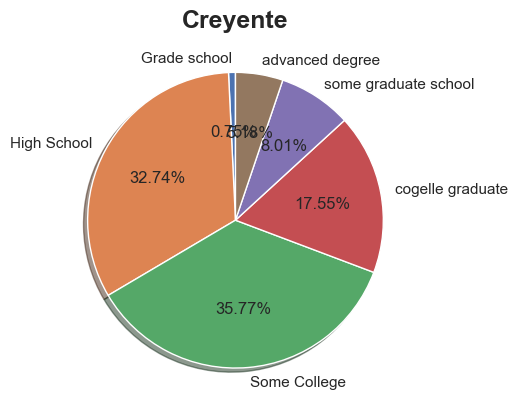

In [21]:
clases = np.array([data_affair[data_affair.educ == 9].shape[0],
                   data_affair[data_affair.educ == 12].shape[0],
                   data_affair[data_affair.educ == 14].shape[0],
                   data_affair[data_affair.educ == 16].shape[0],
                   data_affair[data_affair.educ == 17].shape[0],
                   data_affair[data_affair.educ == 20].shape[0]])
labels = ['Grade school', 'High School', 'Some College', 'cogelle graduate', 'some graduate school', 'advanced degree']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Creyente', fontsize=18, fontweight="bold")
plt.show()

## Comentarios sobre el nivel educacional.
+ 1. Los dos grupos mas grandes son haber terminado la enseñanza media y haber llegado a la universidad.
+ 2. No tiene datos atipicos.
+ 3. La mayor cantidad de persona se encuentra en un porcentaje del 35.77% que corresponde a algunos estudios universitarios.
+ 4. Solo 48 personas llegaron hasta educación básica siendo la cantidad más pequeña.

# Ocupaciones 

Text(0, 0.5, 'Densidad')

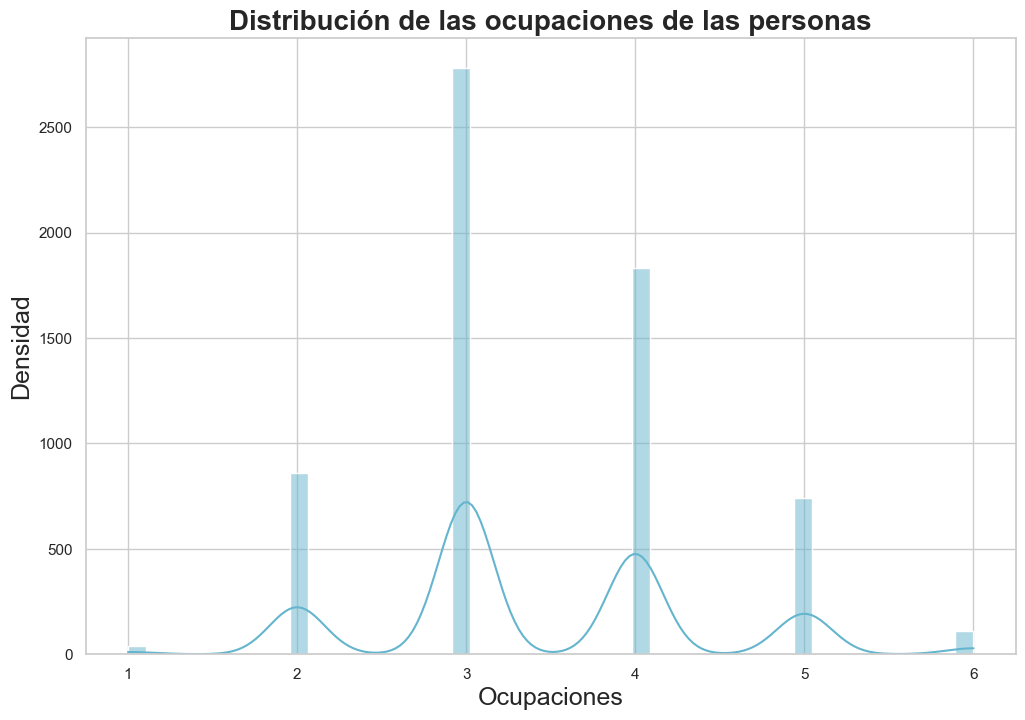

In [22]:
# Escriba su código acá
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['occupation'], kde = True, color = 'c')
plt.title('Distribución de las ocupaciones de las personas', fontsize = 20, fontweight="bold")
plt.xlabel("Ocupaciones", fontsize=18)
plt.ylabel("Densidad", fontsize=18)

In [23]:
pd.DataFrame(data_affair.occupation.describe()).T

,count,mean,std,min,25%,50%,75%,max
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.0,6.0


In [24]:
pd.DataFrame(data_affair.occupation.value_counts())

,count
occupation,
3.0,2783
4.0,1834
2.0,859
5.0,740
6.0,109
1.0,41


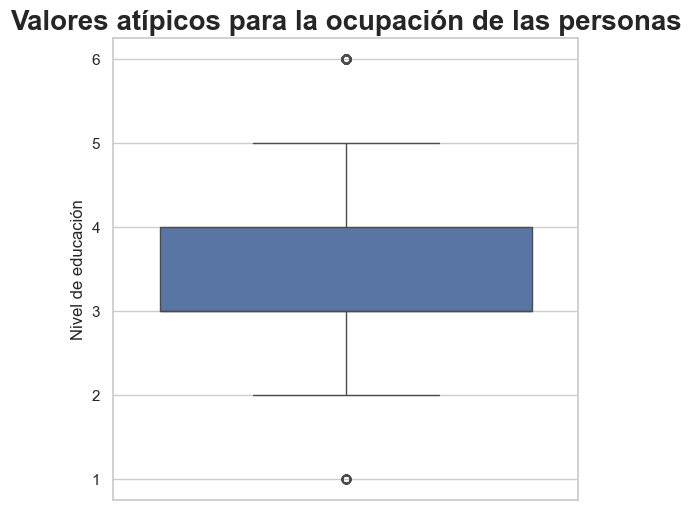

In [29]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la ocupación de las personas", fontsize=20, fontweight="bold")
plt.ylabel("Nivel de educación")
sns.boxplot(y='occupation',data=data_affair);

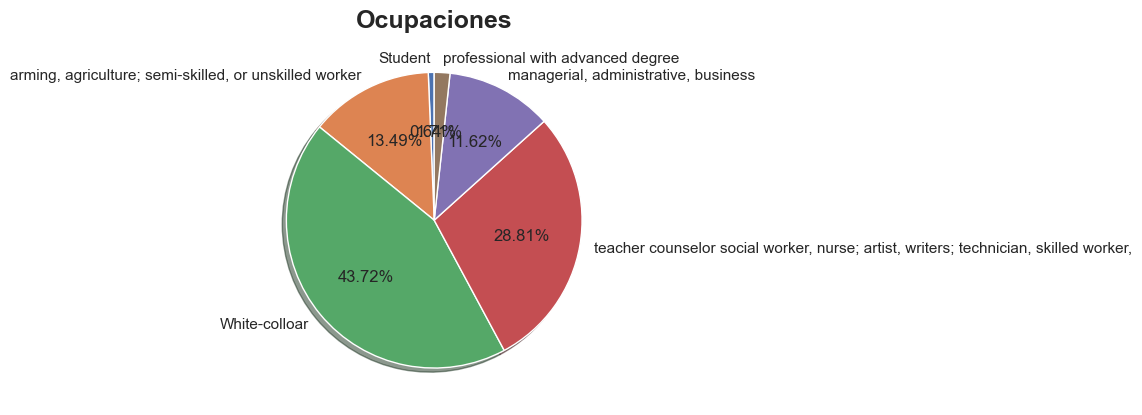

In [33]:
clases = np.array([data_affair[data_affair.occupation == 1].shape[0],
                   data_affair[data_affair.occupation == 2].shape[0],
                   data_affair[data_affair.occupation == 3].shape[0],
                   data_affair[data_affair.occupation == 4].shape[0],
                   data_affair[data_affair.occupation == 5].shape[0],
                   data_affair[data_affair.occupation == 6].shape[0]])
labels = ['Student', 'arming, agriculture; semi-skilled, or unskilled worker', 'White-colloar', 'teacher counselor social worker, nurse; artist, writers; technician, skilled worker,', 'managerial, administrative, business', 'professional with advanced degree']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Ocupaciones', fontsize=18, fontweight="bold");

## Comentarios sobre las ocupaciones de las personas.
+ 1. La minoria de este estudio son estudiantes
+ 2. La mayoria de este estudio son oficinistas
+ 3. Posee valores atipicos que vendrian siendo los de los estudiantes y oficinistas

# Ocupaciones de los esposos

Text(0, 0.5, 'Densidad')

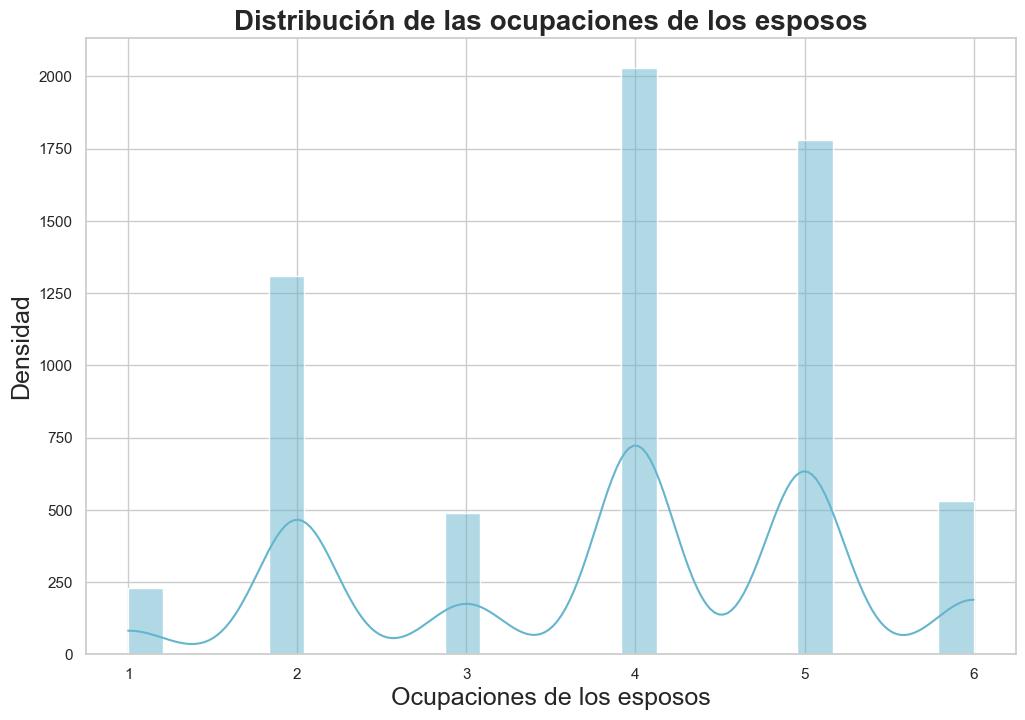

In [38]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['occupation_husb'], kde = True, color = 'c')
plt.title('Distribución de las ocupaciones de los esposos', fontsize = 20, fontweight="bold")
plt.xlabel("Ocupaciones de los esposos", fontsize=18)
plt.ylabel("Densidad", fontsize=18)

In [37]:
pd.DataFrame(data_affair.occupation.describe()).T

,count,mean,std,min,25%,50%,75%,max
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.0,6.0


In [36]:
pd.DataFrame(data_affair.occupation_husb.value_counts())

,count
occupation_husb,
4.0,2030
5.0,1779
2.0,1308
6.0,530
3.0,490
1.0,229


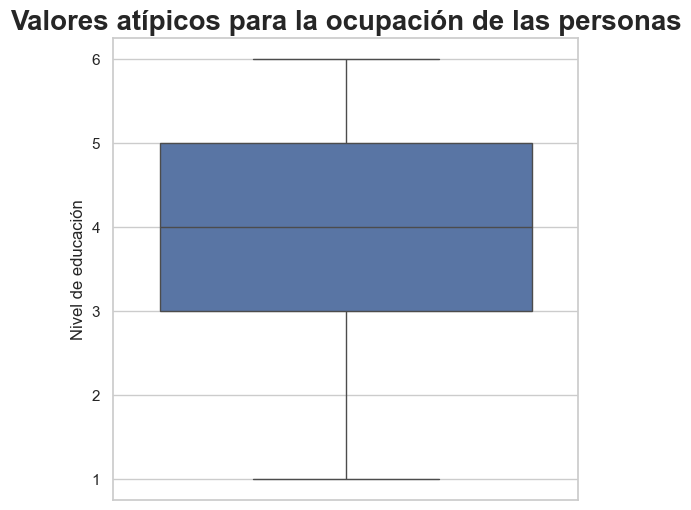

In [35]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la ocupación de las personas", fontsize=20, fontweight="bold")
plt.ylabel("Nivel de educación")
sns.boxplot(y='occupation_husb',data=data_affair);

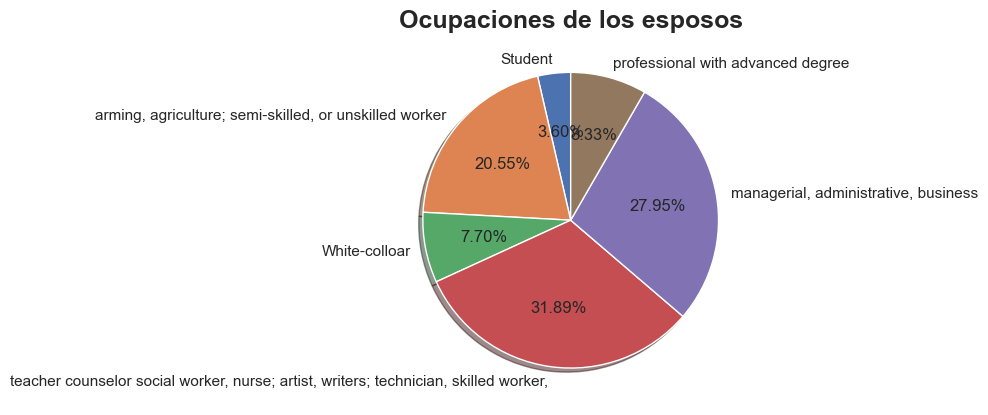

In [39]:
clases = np.array([data_affair[data_affair.occupation_husb == 1].shape[0],
                   data_affair[data_affair.occupation_husb == 2].shape[0],
                   data_affair[data_affair.occupation_husb == 3].shape[0],
                   data_affair[data_affair.occupation_husb == 4].shape[0],
                   data_affair[data_affair.occupation_husb == 5].shape[0],
                   data_affair[data_affair.occupation_husb == 6].shape[0]])
labels = ['Student', 'arming, agriculture; semi-skilled, or unskilled worker', 'White-colloar', 'teacher counselor social worker, nurse; artist, writers; technician, skilled worker,', 'managerial, administrative, business', 'professional with advanced degree']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Ocupaciones de los esposos', fontsize=18, fontweight="bold");

## Comentarios sobre las ocupaciones de los esposos.
+ 1. La minoria de este estudio son estudiantes siendo solo un 3,6 %
+ 2. La mayoria de este estudio son profesionales ocupando mas de un 50% de la poblacion de datos.
+ 3. No posee valores atipicos

# Affair

Text(0, 0.5, 'Densidad')

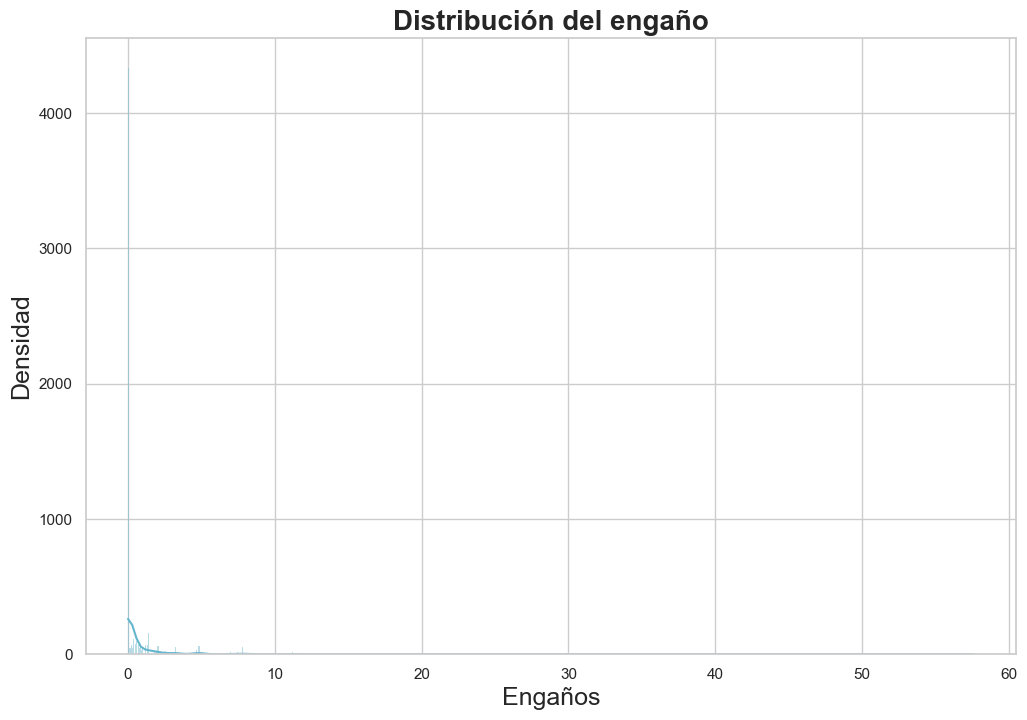

In [44]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['affairs'], kde = True, color = 'c')
plt.title('Distribución del engaño', fontsize = 20, fontweight="bold")
plt.xlabel("Engaños", fontsize=18)
plt.ylabel("Densidad", fontsize=18)

In [45]:
pd.DataFrame(data_affair.affairs.describe()).T

,count,mean,std,min,25%,50%,75%,max
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991


In [46]:
pd.DataFrame(data_affair.affairs.value_counts())

,count
affairs,
0.000000,4313
1.400000,118
0.583333,86
1.333333,72
0.400000,72
...,...
6.260869,1
3.878787,1
7.111111,1


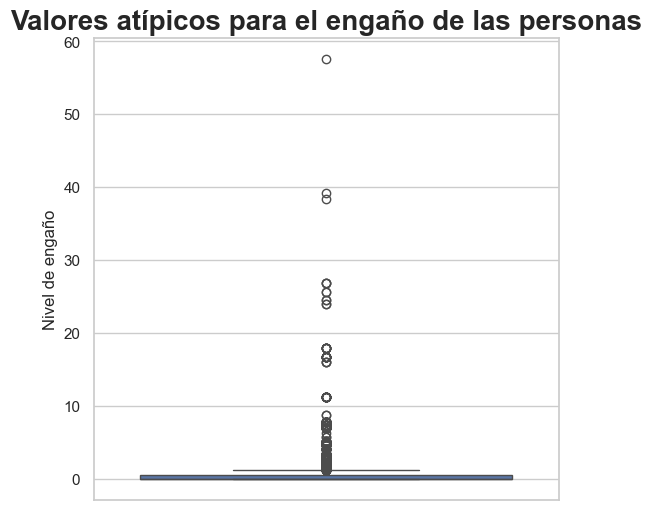

In [47]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para el engaño de las personas", fontsize=20, fontweight="bold")
plt.ylabel("Nivel de engaño")
sns.boxplot(y='affairs',data=data_affair);

Text(0.5, 1.0, 'Distribución de Affairs')

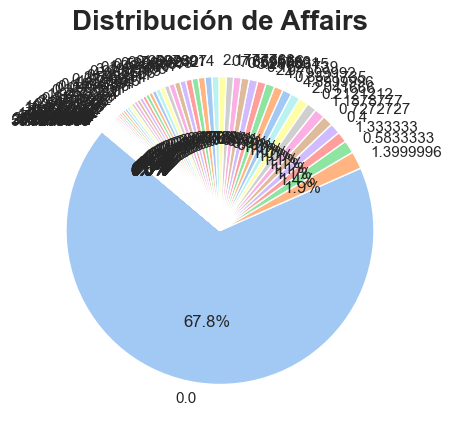

In [48]:
# Contar los valores de age
affair_counts = data_affair['affairs'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(affair_counts, labels=affair_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Affairs', fontsize=20, fontweight="bold")

# Modelos de segmentación

In [25]:
# Escriba su código acá

# Análisis de los grupos

In [26]:
# Escriba su código acá

# Comentarios finales